In [10]:
import numpy as np

import math
import matplotlib.pyplot as plt
from scipy import linalg

print("hello")

hello


In [11]:
x = np.array([1,2,3])

In [12]:
print(x)

[1 2 3]


In [13]:
def origin_data():
    x = np.arange(0, 1, 0.02)
    y = np.sin(x*x + 1)
    return x, y

def add_noise(mu, sigma, y):
    y_noise = np.random.normal(mu, sigma, len(y))
    y = y + y_noise
    return y

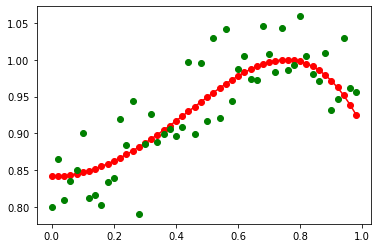

In [14]:
x, y = origin_data()
y_noise = add_noise(0, 0.04, y)
plt.plot(x, y, 'red')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')

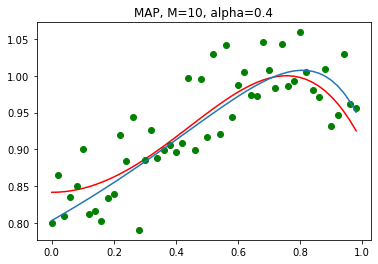

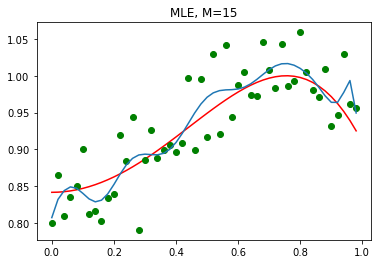

In [42]:
def MAP_fitting(x, y, M, alpha):
#     alpha_beta = alpha**3
    N = len(x)
    X = np.zeros([N, M])
    t = y.T
    for i in range(0, N):
        for j in range(0, M):
            X[i][j] = np.power(x[i], j)
    
    square = np.dot(X.T, X)
    Map = square + alpha * np.eye(M, M)
    inverse = np.linalg.inv(Map)
    w_ = np.dot(inverse, X.T)
    w = np.dot(w_, t)
    return w

def MLE_fitting(x, y, M):
    N = len(x)
    X = np.zeros([N, M])
    t = y.T
    for i in range(0, N):
        for j in range(0, M):
            X[i][j] = np.power(x[i], j)

    pse = linalg.pinv(X)
    w = np.dot(pse, t)
    return w

def MLE_plot(x, y, M):
    w = MLE_fitting(x, y, M)
    N = len(x)
    y_fitting = np.zeros([N])
    for i in range(0, N):
        for j in range(0, M):
            y_fitting[i] += w[j] * np.power(x[i], j)
    plt.plot(x, y_fitting)
    plt.show()
    return y_fitting, w


def MAP_plot(x, y, M, alpha):
    w = MAP_fitting(x, y, M, alpha) 

    N = len(x)
    y_fitting = np.zeros([N])
    for i in range(0, N):
        for j in range(0, M):
            y_fitting[i] += w[j] * np.power(x[i], j)
            
    plt.plot(x, y_fitting)

    plt.show()
    return y_fitting, w


plt.title("MAP, M=10, alpha=0.4")
plt.plot(x, y, 'red')
# plt.plot(x, y, 'ro') 
plt.plot(x, y_noise, 'go')
y_MAP, W_MAP = MAP_plot(x, y_noise, 10, 0.4)

plt.title("MLE, M=15")
plt.plot(x, y, 'red')
# plt.plot(x, y, 'ro') 
plt.plot(x, y_noise, 'go')
y_MLE, W_MLE = MLE_plot(x, y_noise, 15)



In [29]:
def W_error(y, y_fitting):
    error = np.abs(y - y_fitting)
    sum_error = error.sum()
    return sum_error

SUM_ERROR = W_error(y, y_MAP)
print("Total absolute error is: ", SUM_ERROR)
print("Estimated value of w are: ", W_MAP)

Total absolute error is:  0.5510008941623232
Estimated value of w are:  [ 0.80311462  0.24104722  0.08538943  0.0140112  -0.02029166 -0.03565394
 -0.04100844 -0.0410581  -0.03836337 -0.034347  ]


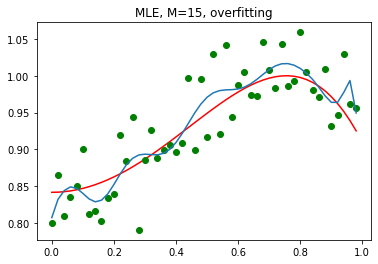

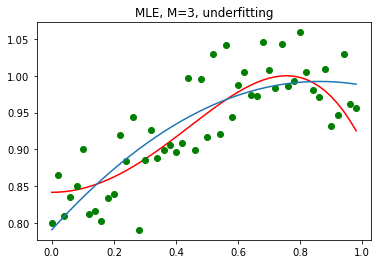

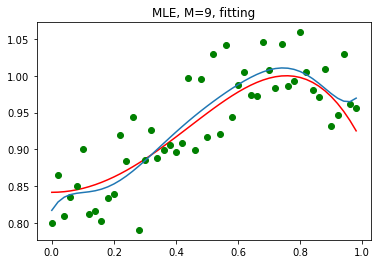

In [33]:
# 7.Experiments with different parameters

plt.title("MLE, M=15, overfitting")
plt.plot(x, y, 'red')
plt.plot(x, y_noise, 'go')
y_MLE, W_MLE = MLE_plot(x, y_noise, 15)

plt.title("MLE, M=3, underfitting")
plt.plot(x, y, 'red')
plt.plot(x, y_noise, 'go')
y_MLE, W_MLE = MLE_plot(x, y_noise, 3)

plt.title("MLE, M=8, fitting")
plt.plot(x, y, 'red')
plt.plot(x, y_noise, 'go')
y_MLE, W_MLE = MLE_plot(x, y_noise, 8)


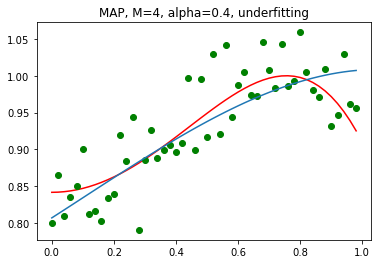

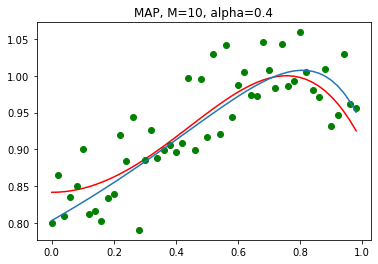

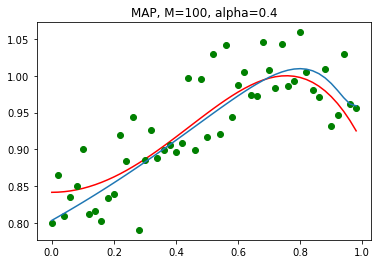

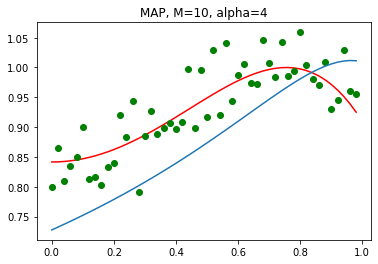

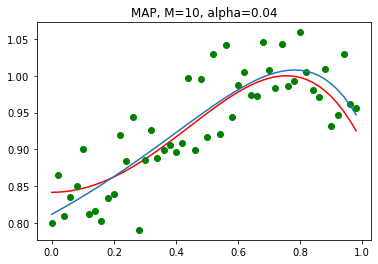

In [46]:
plt.title("MAP, M=4, alpha=0.4, underfitting")
plt.plot(x, y, 'red')
# plt.plot(x, y, 'ro') 
plt.plot(x, y_noise, 'go')
y_MAP, W_MAP = MAP_plot(x, y_noise, 4, 0.4)

plt.title("MAP, M=10, alpha=0.4")
plt.plot(x, y, 'red')
# plt.plot(x, y, 'ro') 
plt.plot(x, y_noise, 'go')
y_MAP, W_MAP = MAP_plot(x, y_noise, 10, 0.4)

plt.title("MAP, M=100, alpha=0.4")
plt.plot(x, y, 'red')
# plt.plot(x, y, 'ro') 
plt.plot(x, y_noise, 'go')
y_MAP, W_MAP = MAP_plot(x, y_noise, 100, 0.4)


plt.title("MAP, M=10, alpha=4")
plt.plot(x, y, 'red')
# plt.plot(x, y, 'ro') 
plt.plot(x, y_noise, 'go')
y_MAP, W_MAP = MAP_plot(x, y_noise, 10, 4)

plt.title("MAP, M=10, alpha=0.04")
plt.plot(x, y, 'red')
# plt.plot(x, y, 'ro') 
plt.plot(x, y_noise, 'go')
y_MAP, W_MAP = MAP_plot(x, y_noise, 10, 0.04)


In [ ]:
Question8: From the experiment in 7, discuss how M and alpha influence on the fitting accuracy.
    According to the experiments shown above, we could konw that for MLE, the model complexity M has huge affect on curve of fitting. 
When W is large, in this case, larger than 10, there will be overfitting performance. While, when M is too small, such as 3, there will
be underfitting.
    For MAP, the model complexity has influence on fitting performance but not so big. When M is so small, such as 4, the underfitting 
situation exists still. But with parameter alpha, when modle complexity M is quite large, such as 100, there will be no overfitting
situation. 
    For parameter alpha, if alpha is too small, in this case, 0.04, the change of fitting curve is not big, because the alpha*I 
is just the variance of Gaussian distribution of W, as long as it exists, Gaussian distribution of W exist, then W for high dimension
of X is pretty close to zero. In that case, the overfitting problem will be solved. However, if the alpha is too big, such as 4, then
in the equation np.dot(X.T, X) + alpha * np.eye(M, M), alpha*I will be the dominant term, which means this matrix will be close to 
identical matrix and this term X.T * X is useless. If so, the effort of calculating MLE or MAP would be in vain which is why the 
fitting curve is in underfitting situation.
(All the situation mentioned above could be found among the figures shown above)